# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
import matplotlib.ticker as mtick

In [2]:
plot_output_dir = "/Users/vibhav/Documents/Projects/nimf-tracker-git/nimf-tracker/Output Plots/"
data_output_dir = "/Users/vibhav/Documents/Projects/nimf-tracker-git/nimf-tracker/Output Data/"

In [3]:
excel_path = "/Users/vibhav/Documents/Projects/nimf-tracker-git/nimf-tracker/Manual/input-data.xlsx"

# GST and eWay

In [4]:
gst = pd.read_excel(excel_path, sheet_name='gst-eway', index_col=0, parse_dates=True)

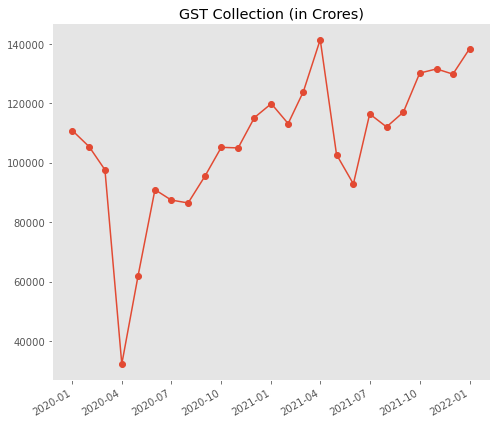

In [5]:
(gst['GST']/10).plot(marker='o', figsize=(7,6), x_compat=True)

plt.title("GST Collection (in Crores)")
# plt.ylabel("YoY Change (in %)")
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+"gst.png", dpi=300)


In [6]:
gst = gst/1000000

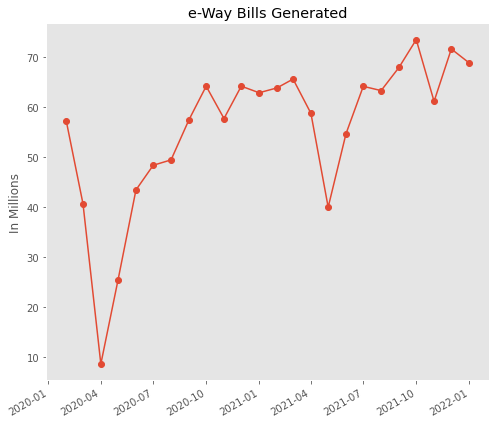

In [7]:
gst[gst.columns[0]].plot(kind='line', marker='o', figsize=(7,6), x_compat=True)
plt.title('e-Way Bills Generated', color='black')
plt.ylabel('In Millions')
# plt.xlabel('Data as on 6 Sep, 2020')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'e-way bills', dpi=150, bbox_inches='tight')


In [8]:
gst.to_csv(data_output_dir+"/gst_eway.csv")

# Truck

In [9]:
truck = pd.read_excel(excel_path, sheet_name="truck",index_col=0, parse_dates=True)

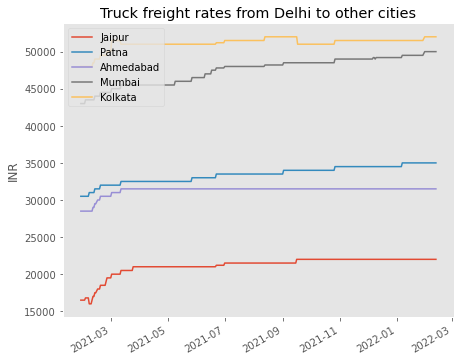

In [10]:
truck['Jaipur'].plot(label='Jaipur')
truck['Patna '].plot(label='Patna')
truck['Ahmedabad '].plot(label='Ahmedabad')
truck['Mumbai '].plot(label='Mumbai')
# truck['Chennai '].plot(label='Chennai')
truck['Kolkata '].plot(label='Kolkata', figsize=(7,6))
plt.legend(loc='upper left')
plt.grid(visible=False)
plt.title('Truck freight rates from Delhi to other cities')
plt.xlabel('')
plt.ylabel('INR')

plt.savefig(plot_output_dir+'truck.png', dpi=150, bbox_inches='tight')



# Energy Consumption

In [11]:
elec = pd.read_excel(excel_path, sheet_name="electricity",index_col=0, parse_dates=True)

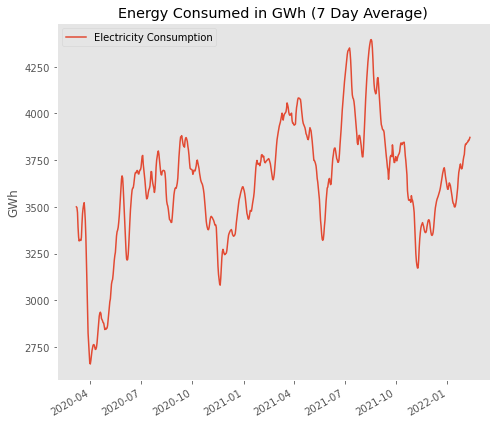

In [12]:
elec['2020-03-01':].rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('GWh')
# plt.grid(b=True, linewidth=0.4)
plt.title('Energy Consumed in GWh (7 Day Average)')
plt.legend()
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'elec.png', dpi=150)


# UPI

In [13]:
upi = pd.read_excel(excel_path, sheet_name="upi",index_col=0, parse_dates=True)

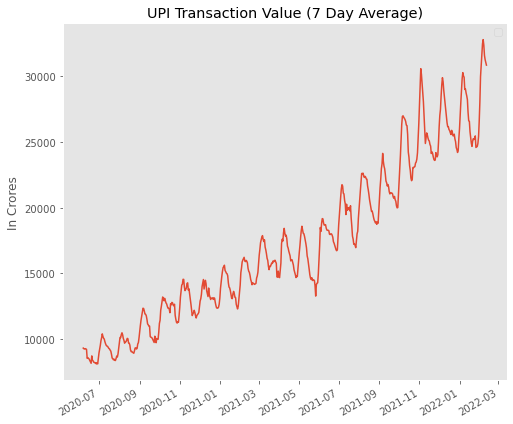

In [14]:
upi.rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.title("UPI Transaction Value (7 Day Average)")
plt.legend("")
plt.xlabel("")

plt.tight_layout()

plt.ylabel('In Crores')

plt.grid(visible=False)

plt.savefig(plot_output_dir+'upi_val.png', dpi=150, bbox_inches='tight')


# Unemployment

## Daily

In [15]:
unemp_daily = pd.read_excel(excel_path, sheet_name="unemp-daily",index_col=0, parse_dates=True)

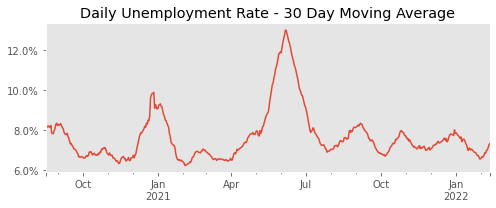

In [16]:
# ax=unemp_daily.plot(secondary_y='Labour   participation rate  (LPR) ')

ax = unemp_daily['UER'].plot(figsize=(7,3), kind='line')

plt.xlabel("")
plt.title('Daily Unemployment Rate - 30 Day Moving Average')

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()

plt.savefig(plot_output_dir+'unemp.png', dpi=300, bbox_inches='tight')


## Weekly

In [17]:
unemp_weekly = pd.read_excel(excel_path, sheet_name="unemp-weekly",index_col=0, parse_dates=True)

In [18]:
unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_14940/2232539766.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]


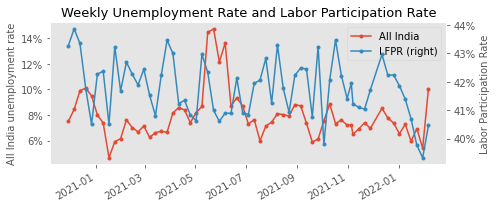

In [19]:
ax = unemp_weekly.plot(figsize=(7,3), x_compat=True, secondary_y=['LFPR'], marker='.')

ax.set_xlabel("")
plt.title('Weekly Unemployment Rate and Labor Participation Rate', fontsize=13)

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.right_ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_ylabel("All India unemployment rate", fontsize=10)
ax.right_ax.set_ylabel("Labor Participation Rate", fontsize=10)

plt.tight_layout()
plt.savefig(plot_output_dir+'weekly_unemp.png', dpi=300, bbox_inches='tight')


# Consumer Sentiment

In [20]:
sent = pd.read_excel(excel_path, sheet_name="sentiment",index_col=0, parse_dates=True, header=1)

In [21]:
sent.rename(columns={"Consumer Sentiment Indices (CMIE-Umich)": "Date"}, inplace=True)
sent.columns = (['Index of Consumer Sentiments-All India ', 'Index of Consumer Sentiments-Urban ',
       'Index of Consumer Sentiments-Rural ', 'Index of Consumer Expectations-All India ',
       'Index of Consumer Expectations-Urban ', 'Index of Consumer Expectations-Rural ',
       'Index of Current Economic Conditions-All India ',
       'Index of Current Economic Conditions-Urban ',
       'Index of Current Economic Conditions-Rural '])

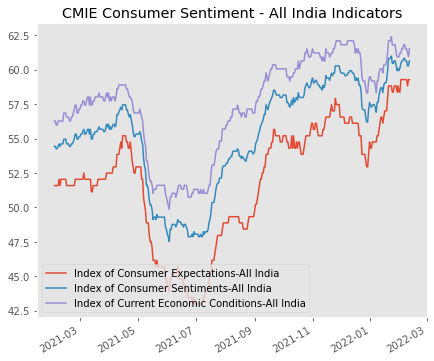

In [22]:
#All India plots
sent['Index of Consumer Expectations-All India '].plot(label='Index of Consumer Expectations-All India ')
sent['Index of Consumer Sentiments-All India '].plot(label='Index of Consumer Sentiments-All India')
sent['Index of Current Economic Conditions-All India '].plot(label='Index of Current Economic Conditions-All India', figsize=(7,6))

plt.xlabel('')
# plt.ylabel('YoY Change in %')
plt.title('CMIE Consumer Sentiment - All India Indicators')
plt.grid(visible=False)
# plt.show()
plt.legend(loc='lower left')
plt.savefig(plot_output_dir+'All India Indicators.png', dpi=300, bbox_inches='tight')



# PMI

In [23]:
pmi = pd.read_excel(excel_path, sheet_name="pmi",index_col=0, parse_dates=True)

In [24]:
pmi

,IHS Markit India manufacturing PMI,IHS Markit India services PMI,IHS Markit India composite PMI
Month,,,
2015-10-01,50.7,53.2,NaN
2015-11-01,50.3,50.1,NaN
2015-12-01,49.1,53.6,NaN
2016-01-01,51.1,54.3,NaN
2016-02-01,51.1,51.4,NaN
...,...,...,...
2021-09-01,53.7,55.2,55.3
2021-10-01,55.9,58.4,58.7
2021-11-01,57.6,58.1,59.2


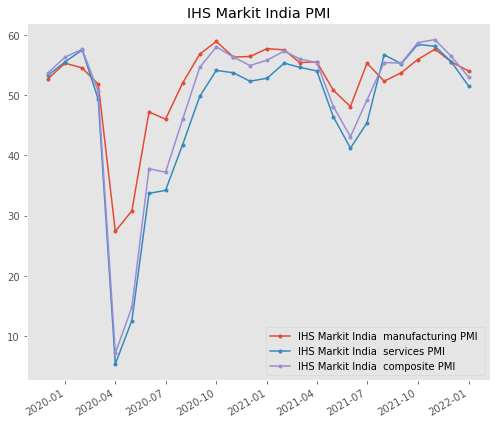

In [25]:
pmi.iloc[50:].plot(marker='.', figsize=(7,6), x_compat=True)
plt.xlabel("")
plt.title('IHS Markit India PMI')
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+'pmi.png', dpi=150)

plt.show()

# Vehicles

In [26]:
vehicle = pd.read_excel(excel_path, sheet_name="vehicles",index_col=0, parse_dates=True)

In [27]:
vehicle.head()

,Total vehicles,Transportation vehicles,Non-transportation vehicles
2015-09-01,1350785,112010,1238775
2015-10-01,1361634,111619,1250015
2015-11-01,1738149,111513,1626636
2015-12-01,1510752,109419,1401333
2016-01-01,1504142,120366,1383776


In [28]:
vehicle.rename(columns={
    "Transportation  vehicles ": "Commercial Vehicles",
    "Non-transportation  vehicles ": "Passenger Vehicles"
}, inplace=True)

In [29]:
vehicle = vehicle.iloc[-30:]
vehicle.index = pd.to_datetime(vehicle.index).to_period('M')

In [30]:
vehicle = vehicle/100000

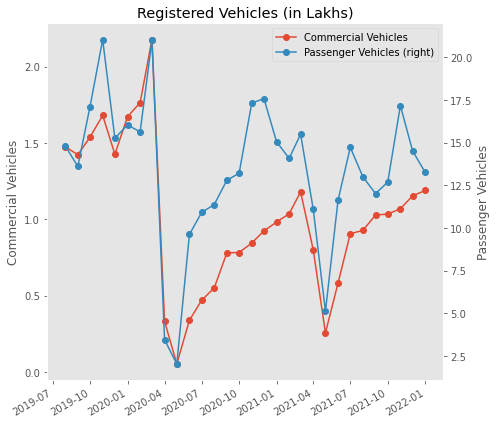

In [31]:
ax=vehicle.plot(kind='line', y='Commercial Vehicles', figsize=(7,6), marker='o', x_compat=True)

ax2=vehicle.plot(kind='line', y='Passenger Vehicles', secondary_y=True, ax=ax, marker='o', x_compat=True)

ax.set_ylabel('Commercial Vehicles')
ax2.set_ylabel('Passenger Vehicles')

plt.title('Registered Vehicles (in Lakhs)')

plt.grid(visible=False)

plt.tight_layout()
plt.savefig(plot_output_dir+'registered_vehicles.png', dpi=300, bbox_inches='tight')

plt.show()

# FasTag

In [32]:
fastag = pd.read_excel(excel_path, sheet_name="fastag",index_col=0, parse_dates=True)

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_14940/989056521.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fastag['Amount (In Cr)']['2020-01-01':].plot(kind='line', alpha=0.8, marker='o', figsize=(7,6), x_compat=True)


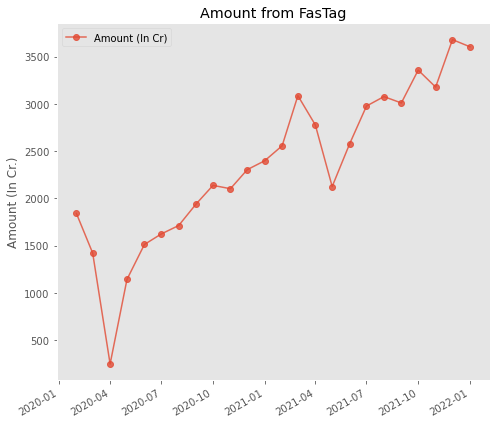

In [33]:
fastag['Amount (In Cr)']['2020-01-01':].plot(kind='line', alpha=0.8, marker='o', figsize=(7,6), x_compat=True)
plt.legend()
plt.xlabel('')
plt.ylabel('Amount (In Cr.)')
plt.grid(visible=False)
plt.title('Amount from FasTag')
plt.tight_layout()

plt.savefig(plot_output_dir+'amt fastag 2020.png', dpi=150, bbox_inches='tight')

plt.show()



# Fuel Consumption

In [65]:
fuel = pd.read_excel(excel_path, sheet_name="fuel-cons",index_col=0, parse_dates=True)

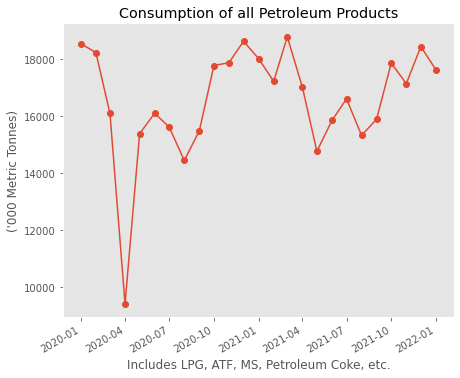

In [66]:
fuel['TOTAL']['2020-01-01':].plot(marker='o', figsize=(7,6), x_compat=True)
plt.xlabel('Includes LPG, ATF, MS, Petroleum Coke, etc.')
plt.ylabel("('000 Metric Tonnes)")
plt.title('Consumption of all Petroleum Products')
plt.grid(visible=False)
plt.tight_layout
plt.savefig(plot_output_dir+'petrol_consump', dpi=300, bbox_inches='tight')


# Monthly

In [36]:
monthly = pd.read_excel(excel_path, sheet_name="monthly-indicators",index_col=0, parse_dates=True)

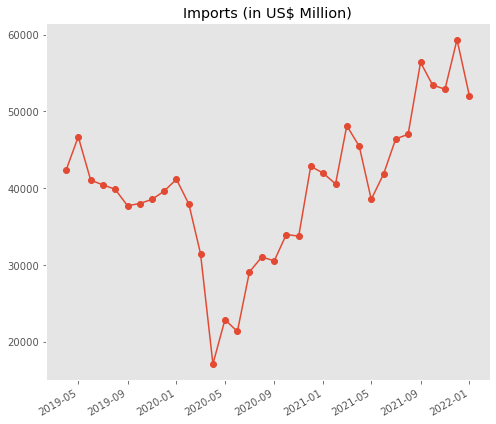

In [37]:
monthly['Imports'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Imports (in US$ Million)')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'imports.png', dpi=300, bbox_inches='tight')




/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_14940/2455038560.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


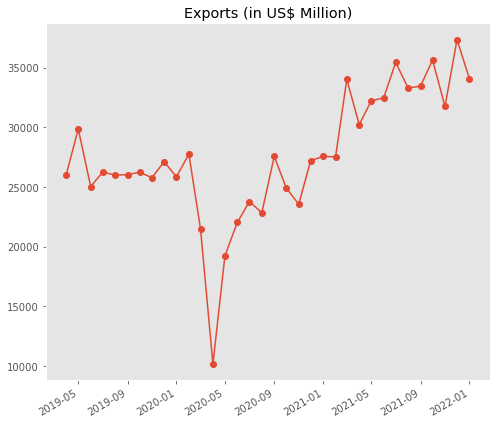

In [38]:
monthly['Exports'].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Exports (in US$ Million)')
plt.grid(b=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'exports.png', dpi=300, bbox_inches='tight')

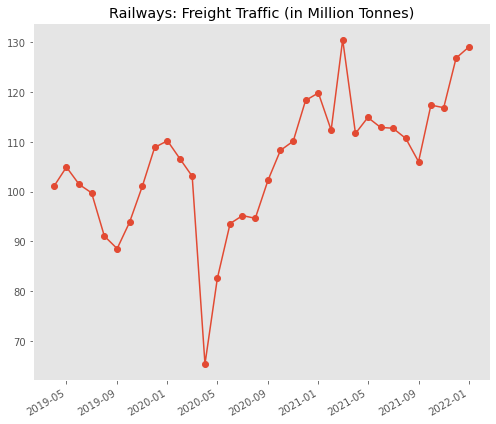

In [39]:

(monthly['Railways: freight traffic']/1000).plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Railways: Freight Traffic (in Million Tonnes)')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'rail.png', dpi=300, bbox_inches='tight')


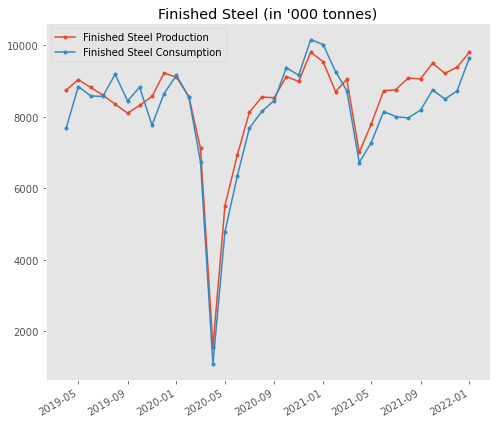

In [40]:
monthly.iloc[:,[0,1]].plot(marker='.', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title("Finished Steel (in '000 tonnes)")
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'steel.png', dpi=300, bbox_inches='tight')




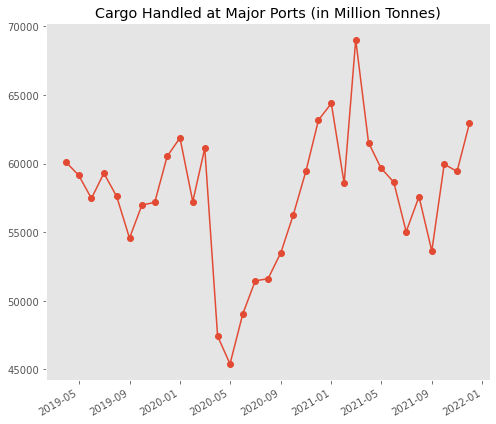

In [41]:

monthly['Port Volume'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Cargo Handled at Major Ports (in Million Tonnes)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'cargo.png', dpi=300, bbox_inches='tight')



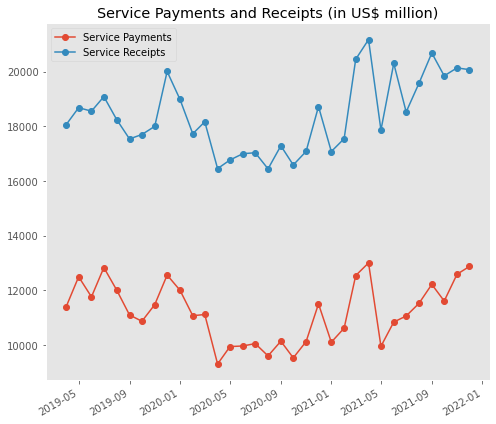

In [42]:
monthly[['Service Payments', 'Service Receipts']].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

plt.title('Service Payments and Receipts (in US$ million)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'service.png', dpi=300, bbox_inches='tight')




In [43]:
monthly

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2019-04-01,8752,7691,101090,42385.7,26036.5,60087.0,1211900.0,2546790.0,18062.0,11402.0
2019-05-01,9043,8850,104910,46685.4,29848.2,59151.0,933890.0,2583080.0,18679.0,12492.0
2019-06-01,8824,8589,101420,41031.8,25027.5,57459.0,1858420.0,2087180.0,18552.0,11758.0
2019-07-01,8613,8573,99740,40429.6,26233.0,59300.0,1386470.0,2255730.0,19084.0,12829.0
2019-08-01,8358,9193,91060,39849.7,25990.3,57603.0,1217060.0,2280230.0,18244.0,12006.0
2019-09-01,8106,8450,88550,37696.8,26025.8,54567.0,2586960.0,3133180.0,17536.0,11096.0
2019-10-01,8321,8831,93820,37986.0,26232.8,56978.0,1323340.0,1662860.0,17698.0,10864.0
2019-11-01,8574,7769,101050,38524.2,25772.2,57172.0,1223390.0,1651520.0,17996.0,11472.0
2019-12-01,9223,8652,108860,39595.6,27108.4,60520.0,2088920.0,2895900.0,20004.0,12555.0
2020-01-01,9114,9168,110190,41151.7,25854.7,61872.0,1479060.0,1586820.0,18985.0,12001.0


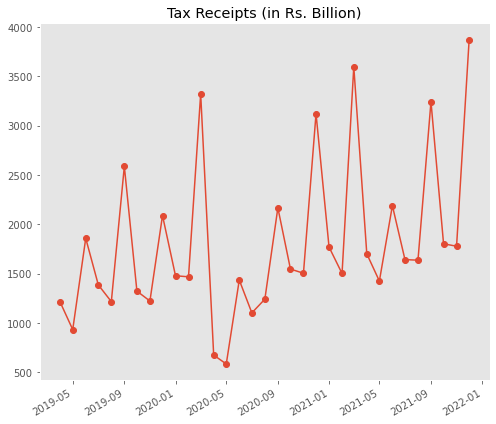

In [44]:
(monthly['Tax Receipts']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Tax Receipts (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'taxreceipt.png', dpi=300, bbox_inches='tight')




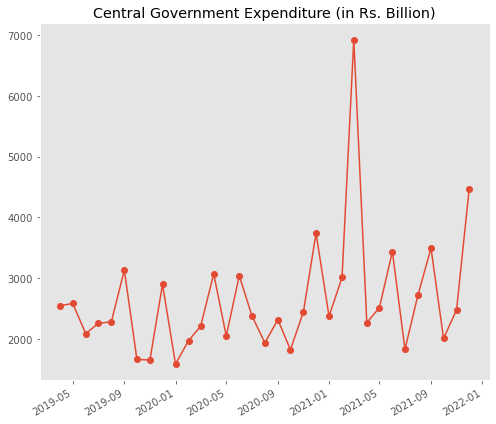

In [45]:
(monthly['Central Government Expenditure']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Central Government Expenditure (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'govtexpenditure.png', dpi=300, bbox_inches='tight')




# Money

In [46]:
money = pd.read_excel(excel_path, sheet_name="money",index_col=0, parse_dates=True)

In [47]:
money

,M3,public
Date,,
2019-09-13,10.08,12.73
2019-09-27,9.65,13.36
2019-10-11,10.01,13.54
2019-10-25,10.60,15.29
2019-11-08,9.93,12.24
...,...,...
2021-12-03,9.17,7.40
2021-12-17,9.34,7.93
2021-12-31,9.91,7.71


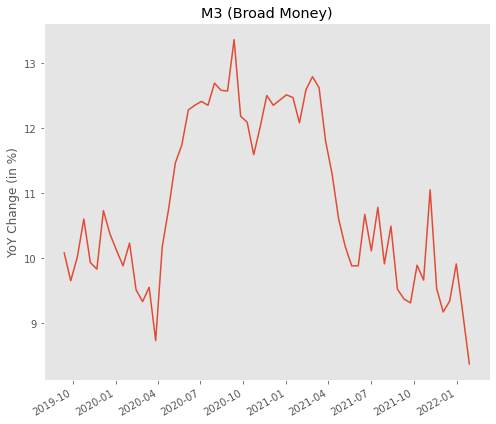

In [48]:
money['M3'].plot(figsize=(7,6), x_compat=True)
plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('M3 (Broad Money)')
plt.tight_layout()
plt.savefig(plot_output_dir+'m3.png', dpi=150, bbox_inches='tight')

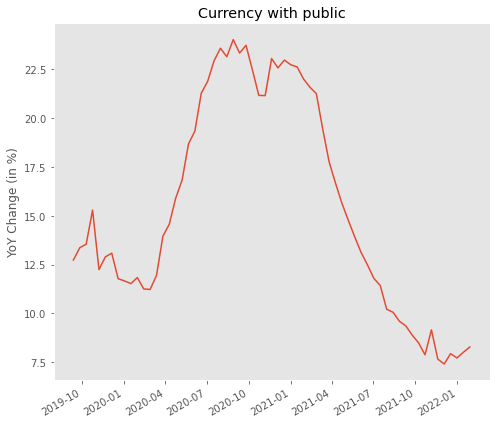

In [49]:
money['public'].plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('Currency with public')
plt.tight_layout()
plt.savefig(plot_output_dir+'public_currency.png', dpi=300, bbox_inches='tight')



# Forex

In [50]:
forex = pd.read_excel(excel_path, sheet_name="forex", index_col=0, parse_dates=True)

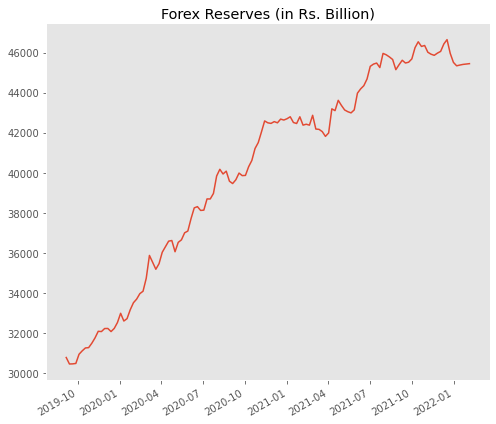

In [51]:
(forex/1000)['Forex Reserves'].plot(figsize=(7,6), x_compat=True)
# plt.ylabel('in Billions of Rs.')
plt.title('Forex Reserves (in Rs. Billion)')
plt.xlabel("")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'forex.png', dpi=300, bbox_inches='tight')



In [52]:
bank = pd.read_excel(excel_path, sheet_name='banking', index_col=0, parse_dates=True)

In [53]:
bank

,Deposits,Credit
Date,,
2018-07-06,8.36,12.74
2018-07-20,8.15,12.40
2018-08-03,8.16,12.61
2018-08-17,8.31,12.92
2018-08-31,8.89,13.38
...,...,...
2021-12-03,9.39,7.35
2021-12-17,9.59,7.27
2021-12-31,10.28,9.16


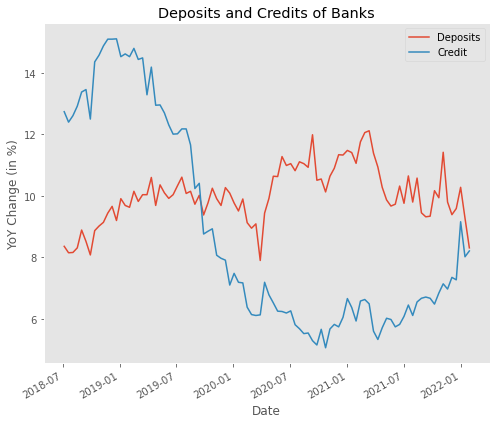

In [54]:
bank.plot(figsize=(7,6), x_compat=True)

plt.ylabel('YoY Change (in %)')
plt.title('Deposits and Credits of Banks')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'banks.png', dpi=300, bbox_inches='tight')


# COVID

## Active - MOHFW

In [55]:
active = pd.read_excel(excel_path, sheet_name='covid-active', index_col=0, usecols=[0,1])

In [56]:
active.loc["India"] = active.sum()[0]

In [57]:
active = active.sort_values(by='Active Cases Total', ascending=False)
active = active/1000

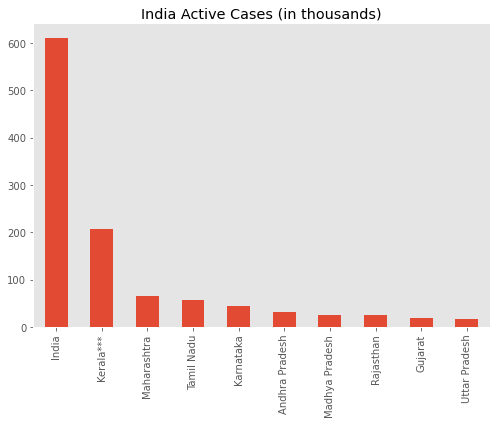

In [58]:
active[:10].plot(kind='bar', figsize=(7,6), legend=False)

plt.xlabel("")
plt.title("India Active Cases (in thousands)")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+"state.png")



# Vaccination - COWIN

In [59]:
vacc = pd.read_excel(excel_path, sheet_name='cowin-state', index_col=0)

In [60]:
vacc['Partially Vaccinated'] = vacc['partial_vaccinated']/vacc['Population']
vacc['Fully Vaccinated'] = vacc['totally_vaccinated']/vacc['Population']
vacc['Vaccinated with precaution dose'] = vacc['Precaution Dose']/vacc['Population']

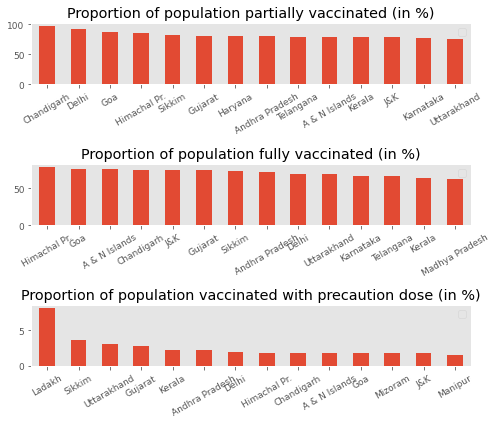

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

ax = ((vacc['Partially Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[0], rot=30)
ax.set_title("Proportion of population partially vaccinated (in %)")
plt.tight_layout()
ax.legend("")
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)
# plt.legend(bbox_to_anchor=(1.05,1))
ax.set_xlabel("")


ax2 = ((vacc['Fully Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[1], rot=30)
ax2.set_title("Proportion of population fully vaccinated (in %)")
plt.tight_layout()
ax2.legend("")
ax2.grid(False)
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.tick_params(axis='both', which='minor', labelsize=9)
# plt.legend(bbox_to_anchor=(1.05,1))
ax2.set_xlabel("")

ax3 = ((vacc['Vaccinated with precaution dose'].sort_values(ascending=False).iloc[0:14])*100).plot(kind='bar', ax=axes[2], rot=30)
ax3.set_title("Proportion of population vaccinated with precaution dose (in %)")
plt.tight_layout()
ax3.legend("")
ax3.grid(False)
ax3.tick_params(axis='both', which='major', labelsize=9)
ax3.tick_params(axis='both', which='minor', labelsize=9)
# plt.legend(bbox_to_anchor=(1.05,1))
ax3.set_xlabel("")

plt.tight_layout()

plt.savefig(plot_output_dir+"vaccines_india.png", dpi=300)




## age wise PIB

In [62]:
age = pd.read_excel(excel_path, sheet_name="age-pib", index_col=0, usecols=[0,1,2,3])

In [63]:
age = age/10000000

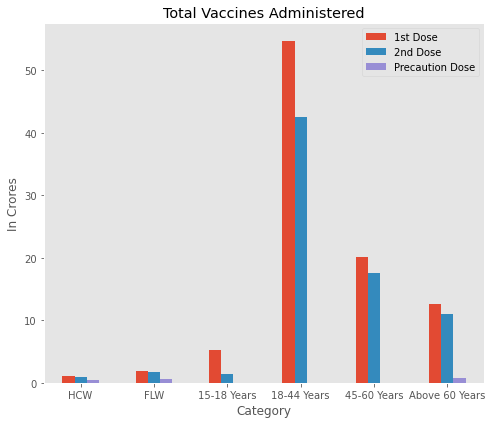

In [64]:
age.plot(kind='bar', rot=0, figsize=(7,6))

# plt.xlabel("\n *45-60 year old with co-morbidities")

plt.ylabel("In Crores")

plt.title("Total Vaccines Administered")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'age_pib.png', dpi=300)
